# Practica 5 - Mineria de Datos

* La practica consiste en evaluar un conjunto de datos con varios métodos y determinar cual método bajo un grupo de parámetros específicos resulta ser el mejor. Se utilizara el dataset de breast cancer proveniente de scikit-learn.

Se importan los modulos:

In [108]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

Se carga el set de datos de **breast_cancer**:

In [109]:
breastCancer = load_breast_cancer()


## Dimensiones del dataset

Las dimensiones se presentan en el siguiente orden: (cantidad de clases, cantidad de atributos, cantidad de instancias)

In [110]:
(len(breastCancer.target_names), len(breastCancer.feature_names), len(breastCancer.data))

(2, 30, 569)

## Algoritmos de clasificación

Los algoritmos de clasificación que seran usados para la comparación, se enlistan a continuación:
* Gaussian Naive Bayes
* Linear SVM
* Quadratic Discriminant Analysis
* Random Forest 
* Neural Network (MLP)

Se procede a cargas las librerias que se utilizaran para los algoritmos:

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


Se crea el gráfico de los valores iniciales del dataset:

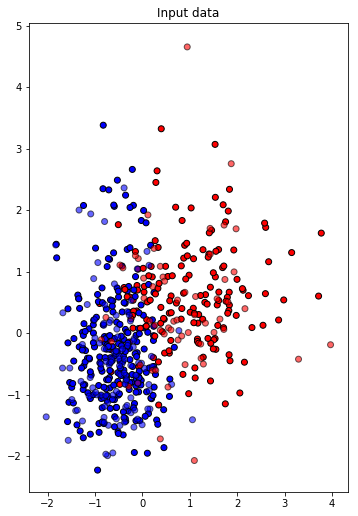

In [112]:
X = StandardScaler().fit_transform(breastCancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, breastCancer.target, test_size=0.3)
figure = plt.figure(figsize=(40, 50))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(breastCancer), 6, 1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, cmap=cm_bright, edgecolors='k')

### Gaussian Naive Bayes

NOTA: Para este metodo no se aplica ninguna optimizacion de parámetros, dado que no recibe ninguno.

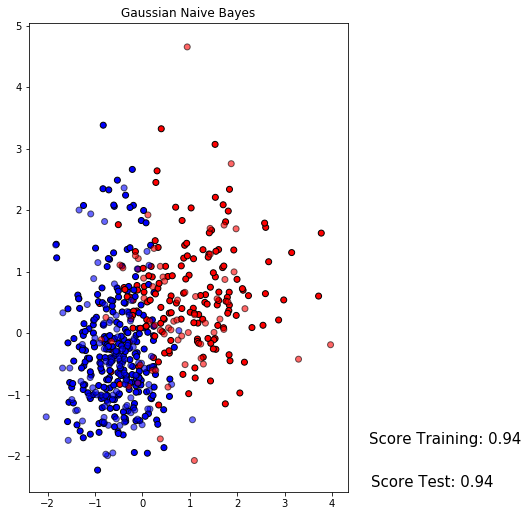

In [113]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train).predict(X_train)
gaussian_score_training = gaussian_clf.score(X_train, y_train)
gaussian_score_test = gaussian_clf.score(X_test, y_test)
figure = plt.figure(figsize=(40, 50))
ax = plt.subplot(len(breastCancer), 6, 1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
ax.set_title("Gaussian Naive Bayes")
ax.text(8,-1.8, ('Score Training: %.2f' % gaussian_score_training).lstrip('0'), size=15, horizontalalignment='right')
ax.text(7.5,-2.5, ('Score Test: %.2f ' % gaussian_score_test).lstrip('0'), size=15, horizontalalignment='right')



### Linear SVM

In [120]:
training_accuracy = []
test_accuracy = []
c_range_svm = []
for i in range(1,30):
    c_range_svm.append(i*0.001)
for c in c_range_svm:
    svm_clf = SVC(kernel="linear", C=c)
    svm_clf.fit(X_train, y_train)
    training_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))

#### Optimización de Parámetros

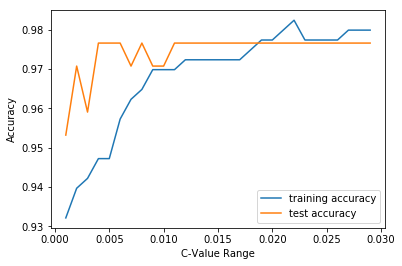

In [121]:
plt.plot(c_range_svm, training_accuracy, label="training accuracy")
plt.plot(c_range_svm, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C-Value Range")
plt.legend()

Ejecución con parámetro óptimo: 

In [129]:
svm_clf = SVC(kernel="linear", C=0.0175)
svm_clf.fit(X_train, y_train)
svm_score_training = svm_clf.score(X_train, y_train)
svm_score_test = svm_clf.score(X_test, y_test)

(svm_score_training, svm_score_test)


(0.97487437185929648, 0.97660818713450293)

### Quadratic Discriminant Analysis

In [130]:
training_accuracy_qda = []
test_accuracy_qda = []
c_range_qda = []
for i in range(1,10):
    c_range_qda.append(i*0.1)
for c in c_range_qda:
    qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=c, store_covariance=False, tol=0.0001, store_covariances=None)
    qda_clf.fit(X_train, y_train)
    training_accuracy_qda.append(qda_clf.score(X_train, y_train))
    test_accuracy_qda.append(qda_clf.score(X_test, y_test))

#### Optimización de Parámetros

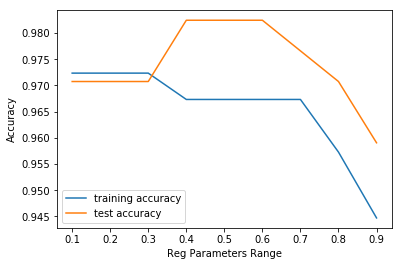

In [131]:
plt.plot(c_range_qda, training_accuracy_qda, label="training accuracy")
plt.plot(c_range_qda, test_accuracy_qda, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Reg Parameters Range")
plt.legend()

Ejecución con parámetro óptimo:

In [136]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.315, store_covariance=False, tol=0.0001, store_covariances=None)
qda_clf.fit(X_train, y_train)
qda_score_training = qda_clf.score(X_train, y_train)
qda_score_test = qda_clf.score(X_test, y_test)

(qda_score_training, qda_score_test)

(0.96984924623115576, 0.9707602339181286)

### Random Forest

In [139]:
training_accuracy_rf = []
test_accuracy_rf = []
n_range = range(1,50)
for n in n_range:
    rf_clf = RandomForestClassifier(max_depth=5, n_estimators=n, max_features=2)
    rf_clf.fit(X_train, y_train)
    training_accuracy_rf.append(rf_clf.score(X_train, y_train))
    test_accuracy_rf.append(rf_clf.score(X_test, y_test))

### Optimización de Parámetros

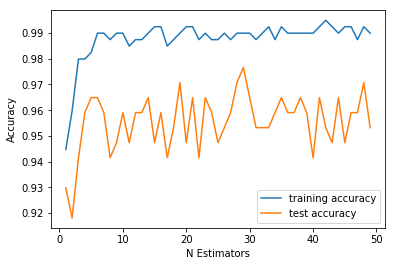

In [140]:
plt.plot(n_range, training_accuracy_rf, label="training accuracy")
plt.plot(n_range, test_accuracy_rf, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N Estimators")
plt.legend()

In [141]:
rf_clf = RandomForestClassifier(max_depth=5, n_estimators=2, max_features=2)
rf_clf.fit(X_train, y_train)
training_accuracy_rf = rf_clf.score(X_train, y_train)
test_accuracy_rf = rf_clf.score(X_test, y_test)

(training_accuracy_rf, test_accuracy_rf)

(0.97487437185929648, 0.94736842105263153)

### Neural Network

In [142]:
training_accuracy_mlp = []
test_accuracy_mlp = []
alpha_range = []
for i in range(1,15):
    alpha_range.append(i*0.1)
for a in alpha_range:
    mlp_clf = MLPClassifier(alpha=a)
    mlp_clf.fit(X_train, y_train)
    training_accuracy_mlp.append(mlp_clf.score(X_train, y_train))
    test_accuracy_mlp.append(mlp_clf.score(X_test, y_test))

/Users/paolacalderon/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Optimización de Parámetros

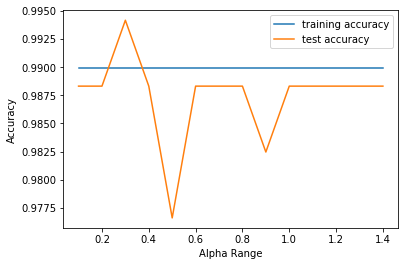

In [143]:
plt.plot(alpha_range, training_accuracy_mlp, label="training accuracy")
plt.plot(alpha_range, test_accuracy_mlp, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha Range")
plt.legend()

In [144]:
mlp_clf = MLPClassifier(alpha=0.23)
mlp_clf.fit(X_train, y_train)
training_accuracy_mlp = mlp_clf.score(X_train, y_train)
test_accuracy_mlp = mlp_clf.score(X_test, y_test)

(training_accuracy_mlp, test_accuracy_mlp)

/Users/paolacalderon/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.98994974874371855, 0.98245614035087714)

## Cross Validation

Se cargan las librerias que corresponden a los métodos de cross-validation:

In [145]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

loo = LeaveOneOut()
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

Se aplican los métodos de Cross-Validation para cada clasificación:

### Gaussian Naive Bayes

In [146]:
scores_gaussian_loo_cv = cross_val_score(gaussian_clf, breastCancer.data, breastCancer.target, cv=loo)
print("Number of cv iterations: ", len(scores_gaussian_cv))
print("Mean accuracy: {:.2f}".format(scores_gaussian_cv.mean()))

Number of cv iterations:  569
Mean accuracy: 0.94


In [147]:
scores_gaussian_sf_cv = cross_val_score(gaussian_clf, breastCancer.data, breastCancer.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores_gaussian_sf_cv))

Cross-validation scores:
[ 0.92982456  0.93684211  0.95789474  0.93684211  0.92982456  0.94385965
  0.95087719  0.95789474  0.94035088  0.95789474]


### Linear SVM

In [148]:
scores_svm_loo_cv = cross_val_score(svm_clf, breastCancer.data, breastCancer.target, cv=loo)
print("Number of cv iterations: ", len(scores_svm_loo_cv))
print("Mean accuracy: {:.2f}".format(scores_svm_loo_cv.mean()))

Number of cv iterations:  569
Mean accuracy: 0.95


In [149]:
scores_svm_sf_cv = cross_val_score(svm_clf, breastCancer.data, breastCancer.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores_svm_sf_cv))

Cross-validation scores:
[ 0.95789474  0.94736842  0.93684211  0.94736842  0.96491228  0.95438596
  0.94385965  0.92280702  0.93684211  0.94736842]


### Quadratic Discriminant Analysis

In [150]:
scores_qda_loo_cv = cross_val_score(qda_clf, breastCancer.data, breastCancer.target, cv=loo)
print("Number of cv iterations: ", len(scores_qda_loo_cv))
print("Mean accuracy: {:.2f}".format(scores_qda_loo_cv.mean()))

Number of cv iterations:  569
Mean accuracy: 0.95


In [151]:
scores_qda_sf_cv = cross_val_score(qda_clf, breastCancer.data, breastCancer.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores_qda_sf_cv))

Cross-validation scores:
[ 0.95087719  0.94035088  0.94385965  0.96140351  0.95789474  0.95087719
  0.94035088  0.95087719  0.92982456  0.95087719]


### Random Forest

In [152]:
scores_rf_loo_cv = cross_val_score(rf_clf, breastCancer.data, breastCancer.target, cv=loo)
print("Number of cv iterations: ", len(scores_rf_loo_cv))
print("Mean accuracy: {:.2f}".format(scores_rf_loo_cv.mean()))

Number of cv iterations:  569
Mean accuracy: 0.93


In [153]:
scores_rf_sf_cv = cross_val_score(rf_clf, breastCancer.data, breastCancer.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores_rf_sf_cv))

Cross-validation scores:
[ 0.93684211  0.90877193  0.94035088  0.87017544  0.88421053  0.93684211
  0.93333333  0.90175439  0.91578947  0.94035088]


### Neural Network

In [154]:
scores_mlp_loo_cv = cross_val_score(mlp_clf, breastCancer.data, breastCancer.target, cv=loo)
print("Number of cv iterations: ", len(scores_mlp_loo_cv))
print("Mean accuracy: {:.2f}".format(scores_mlp_loo_cv.mean()))

Number of cv iterations:  569
Mean accuracy: 0.75


In [155]:
scores_mlp_sf_cv = cross_val_score(mlp_clf, breastCancer.data, breastCancer.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores_mlp_sf_cv))

Cross-validation scores:
[ 0.69473684  0.8877193   0.87017544  0.36842105  0.39649123  0.63859649
  0.70175439  0.36140351  0.69122807  0.36140351]


## Conclusiones

* En los resultados del CV con el algoritmo MLP, se encuentra una alta sensibilidad del modelo, pues los scores obtenidos son inesperadamente bajos, dado el resultado tan alto obtenido por la ejecución de la clasificación(0.75 vs 0.98).
* Los resultados obtenidos en las clasificaciones de Quadratic Discriminant Analysis y Linear SVM fueron muy similares tanto a nivel de scores con valores óptimos como en el Cross Validation. Esto podría indicar que el uso de ambos métodos resulta beneficioso para el comportamiento que tiene este dataset.
* Los resultados obtenidos por el algoritmo Random Forest, indican un overfitting en el modelo. Sin embargo, descartamos que realmente exista esta situación, pues existen otros algoritmos que generalizan mejor el modelo, lo que indica, que el algoritmo mencionado puede afectar el analisis que se pueda hacer sobre los datos.
* Los 2 modelos lineares usados (QDA y SVM) utilizan la regularización en sus parámetros para poder ajustar de forma óptima conjuntos de datos grandes o dispersos. Se debe considerar como observación exploratoria, que el uso de estos modelos sobre datos que impliquen una dispersión en los valores, puede beneficiar a la generalización del modelo, permitiendo rápidos entrenamientos y mejores predicciones, así como la fácil comprensión del modelo en general.